# Numerical Methods Week 1: Euler's Method
### written by Ernesto Barraza (UC Irvine), Hannah Hasson (Sandia) and Sara Negussie (LANL)

Reminder: [Code of conduct](https://docs.google.com/presentation/d/1UiBbQLGCZ_8VTTufJGitjnfz2Lj12TzAPuvHLvRLMhk/edit?usp=sharing)



---

Welcome to the first lesson of Part 2: Numerical Methods. We will now switch focus from Python syntax and begin to focus on **algorithms**, or a list of steps that solve a certain problem. An algorithm could be the steps to bake a cake, tie your shoes, or drive from your house to work. Today, our metaphorical "cake" we're baking is the physics problem we want to solve & evolve in time. Let's see one method by which people do this: **Euler's Method**.


Here are the goals of today's lesson

##**Goals**:


*   Understand discretization
*   Learn what an Ordinary Differential Equation is
*   Use Code Flow Diagrams to understand algorithms
*   Learn Euler's algorithm
*   Solve 2 System of ODEs numerically



We start, as always, by loading in all of the packages we will need for today

In [1]:
#Our usual suspects
import numpy as np
import matplotlib.pyplot as plt

#Plotting customizations
plt.rcParams['figure.figsize'] = [6, 4] #Set a figure size for plots

import random #for generating random numbers

# **Fundamentals of Numerical Analysis: Discretization**

Unfortunately, many real life problems are too complicated to be solved by nice and pretty **analytic functions** ("analytic" = can be written as a finite equation). We will often need computers to help us solve these kinds of problems by breaking them into a series of many small calculations.

&nbsp;

This introduces the concept of **discrete variables**, as opposed to continuous ones, in computation. Having a discrete time variable, for example, would mean that we are only calculating our problem's solution in certain steps of space or time, e.g. at *t = 10, 20, 30* and *40* seconds. We would not have solutions for times in between these steps.

&nbsp;

We have to do this because a computer does not have infinite memory to solve the function for every single possible value that a variable can take. Thus, we pick a size to step between each of the calculations we do, and we try to minimize the amount of error that comes with working this way.

<p align="center">
  <img width="400" src="https://media.geeksforgeeks.org/wp-content/uploads/20190508222632/0f67a451-4895-4a17-9e5f-3bd80f7d2545-300x200.png">
</p>


We represent our discrete time step as $\Delta t$, where we can make $\Delta t$ any real number such as: $\Delta t =0.1$ sec. So our function we are solving can only have values at intervals of $\Delta t$ or 0.1 seconds. Again, **there can be no values of *t* in between 0.1 and 0.2**. Once we choose our timestep, it is set.

You can think of this timestep as the pages of a flipbook:

<p align="center">
  <img width="400" src="https://mlrxrsslk2yj.i.optimole.com/_FVAsf8-_NmyxSiT/w:450/h:295/q:auto/https://nubuntu.org/wp-content/uploads/2015/06/flipbook-11.gif">
</p>


All of this means we will need to discretize our equations too in order to solve them on computers. One of the methods of discretizing differential equations is **Euler's Method**



# **Euler's Method**

Let's say we have a derivative $R'$ that tells us how the variable $R$ evolves, BUT that derivative also depends on the value of $R$ itself. **This is referred to as a differential equation**. This means that $R$ is a function, and the derivative $R'(t)$ is how the function changes with respect to a change in both time and $R$.

&nbsp;

In general, solving this type of problem on pen and paper can often be difficult if not impossible, so we can apply an algorithm that calculates both $R$ and $R'(t)$ at each step, and updates as we go! We will learn how to do that now.

&nbsp;

We start by writing an expression for the derivative:

 $$\begin{align}
R'(t) = f(t,R(t))
\tag{1}
 \end{align}$$

&nbsp;

where $f$ is some function dependent on both the variable $t$ and function $R(t)$. **Euler's method then assumes a derivative can be discretized as**

 $$\begin{align}
R'(t) \approx \frac{1}{\Delta t} [R(t+\Delta t)-R(t)]
\tag{2}
 \end{align}$$

This is the critical bit of information for this algorithm. Pause for a moment and think about what we are saying here. This is the slope formula for our variable $R$. $R[t+\Delta t]$ is just the value of $R$ one time step $\Delta t$ later.

&nbsp;

<!-- So, for example, if we write this for the derivative of position, $x$, we have

$$\begin{align}
 \vec{x}' =\frac{d}{dt}\vec{x} \approx \frac{1}{\Delta t} [\vec{x}(t+\Delta t)-\vec{x}(t)]
\tag{3}
 \end{align}$

&nbsp; -->

Now, how does this help us? Well, we can shuffle things around in this formula to solve for the next value of $R(t+\Delta t)$:

$$\begin{align}
  R(t+\Delta t) = R(t)+\Delta t \cdot R'(t) \tag{3}\\
\end{align}$$

&nbsp;

This means that every time we want to move forward a step in time, we simply take the current values of $t$ and $R$ to calculate $R'(t)$, then plug all three of those values into Equation 4 and we get the next value of the function's solution! All we need to get the solution moving is an initial $R$ value and formulas for $R(t)$ and $R'(t)$.

&nbsp;

**This is all very abstract, please give me a real example**

Sure. Let's do this for position $\vec{x}$ versus time $t$. Just as in Eq. 3 above, we write the expression for the next step

$$\begin{align}
  \vec{x}(t+\Delta t) = \vec{x}(t)+\Delta t \cdot \vec{x}'(t)
\end{align}$$

But we know that $\vec{x}'$ is just the velocity $\vec{v}$', so we can replace that:

$$ \vec{x}(t+\Delta t)  = \vec{x}(t) + \Delta t \cdot \vec{v}(t) $$

Given an initial value for position $\vec{x}(t)$ and a formula for velocity $\vec{v}(t)$, we can use a computer to solve for a future position value at $t+\Delta t$. We can predict the position of the particle in the future $\vec{x}(t+\Delta t)$! With some errors of course. The following image is a visual representation of Euler's method.

&nbsp;



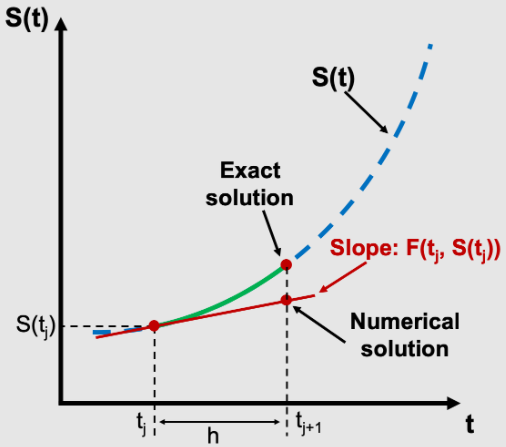

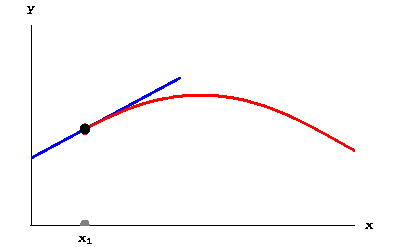

By approximating each next step with a straight line, we are destined to instroduce error into our answer. Importantly, the larger our $\Delta t$ steps are, the bigger error we will accumulate. The key is to choose our $\Delta t$ steps to be as small as possible without making the calculation take forever. There is an optimum where making the $\Delta t$ steps any smaller won't add much more accuracy to our solution, so we will generally be trying to find that happy medium.

# **Our first physics problem: 1D Mass on a Spring**

##Physics of the problem
We will first use Euler's method on a problem we know the analytical solution to: [a 1D mass on a spring](https://thumbs.gfycat.com/DeliciousAromaticKoalabear-max-1mb.gif). We are considering this in one dimension without any friction or outside forces. This would be what we call a Simple Harmonic Oscillator, which will just swing back and forth.




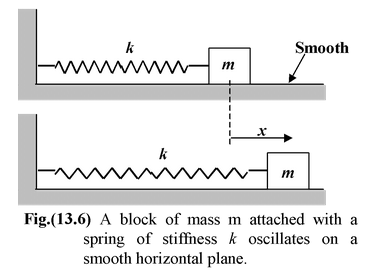

Our equation of motion (force equation) for a mass on a spring without gravity is

 $$\begin{align}
F = -k\: (x - x_{eq})
\tag{4}
\end{align}$$

assuming that the mass is at $x=x_{eq}$ when the spring is at equilibrium (not stetched or compressed).

&nbsp;

We know that force is mass multiplied by acceleration, so we can replace *F* with *m a*. We can then rewrite acceleration as the derivative of velocity or second derivative of position:

$$m\:a = -k\,x $$
$$⇒\frac{d^2 x}{dt^2} = -\frac{k\,x}{m}. \tag{5}$$

&nbsp;

Now our two variables are time ($t$) and position ($x$). If we solve this equation by integration we will get a solution for the position as a function of time to be:

 $$\begin{align}
x = A \: cos \left(\omega\:t \right) \tag{6}
\end{align}$$

where *A* is the initial amplitude and

$$\begin{align}
\omega = \sqrt{\frac{k}{m}} \tag{7}
\end{align}$$

is the angular frequency of the motion.

You can check the solution and plug it into equation (5) to make sure we're correct!



&nbsp;

## Apply Euler's Method to the problem

Let's apply Euler's method to the mass on a spring. First, we re-write equation (5) as a a system of ordinary differential equations for position and velocity:


$$\begin{align}
F = m\:a ⇒\frac{d v}{dt} = -\frac{k}{m}\:(x - x_{eq})
\tag{8a}
\end{align}$$

$$\begin{align}
\frac{d x}{dt} = v
\tag{8b}
\end{align}$$

From here we apply the Euler's method assumption from earlier to equation (8a) by splitting the derivative as follows:

$$\begin{align}
\frac{d v}{dt} ⇒ \frac{v(t+\Delta t) - v(t)}{\Delta t}  = -\frac{k}{m}\: (x - x_{eq})
\end{align}$$

Solving for our future velocity $v(t+\Delta t)$ we get:

$$\begin{align}
v(t+\Delta t)  = v(t) -\frac{k \Delta t}{m}\: (x - x_{eq})
\tag{9a}
\end{align}$$


We can do a similar thing for equation (8b) and get:


$$\begin{align}
\frac{d x}{dt} ⇒ \frac{x(t+\Delta t) - x(t)}{\Delta t}  = v(t)
\end{align}$$

So that the future discrete position is:

$$\begin{align}
x(t+\Delta t)  = x(t) + \Delta t \: v(t)
\tag{9b}
\end{align}$$

With Equations (9a) and (9b) we have a full discretized equations of motion for a mass on a spring and can now program it in python.



## Code Flow Diagrams
We will now go through the steps needed to advance the calculation for the amount of steps desired.

&nbsp;

Code flow diagrams allow algorithms to be abstracted to higher levels so that others can easily read and understand the algorithm without needing to know a specific programming language. Many if not all computational scientists start each problem by drawing code flow diagrams before coding up their algorithms. Additionally, code flow diagrams are much better for presentations, since they give a visual guide to the logic.

&nbsp;

Below is an example of a code flow diagram of Euler's Method for the equations of motion for a mass on a spring:

## Notations for discretized values

Sometimes it's easier to use simpler notation rather than writing $ t + \Delta t$, $ t + 2 \Delta t$ ,$ t + 3\Delta t$ ...

If we know how many time steps we will simulate, it's easier to use iterator notation. In for loops, we use an iterator variable (such  as '`i`' when saying `for i in arrayname:`). For the initial time step ($t = 0$), that is our first iteration through our main loop so we can define values as: $i=0$. Here is a cleaner way of writing that:

$$
x(t=0) \rightarrow x_{i=0} \rightarrow x_0
$$

$$
v(t=0) \rightarrow v_{i=0} \rightarrow v_0
$$

&nbsp;

The next iteration will be $i=1$, then $i=2$, etc:
$$
x_{i=1} \rightarrow x_1
$$

$$
x_{i=2} \rightarrow x_2
$$

$$
\vdots
$$

$$
v_{i=1} \rightarrow v_1
$$

$$
v_{i=2} \rightarrow v_2
$$

$$
\vdots
$$

Thus, our equations 9a and 9b can be re-written in a more compact form:

$$\begin{align}
v_{i+1}  = v_i -\frac{k \Delta t}{m}\: (x - x_{eq})
\tag{10a}
\end{align}$$


$$\begin{align}
x_{i+1}  = x_i + \Delta t \cdot v_i
\tag{10b}
\end{align}$$

<p align="left">
  <img width="500" src="https://drive.google.com/uc?id=1KUsaVHYgS6Vu61LTZMJVwDEBFfUPuag_">

</p>

Note that the code is broken into 2 main sections: the initial conditions (first block) and the "Main Loop" (everything else). The Main Loop is where you will run a for loop that computes the position and velocity for one time step, then moves to the next. We will loop through the timestep number, but can convert this to actual time by multiplying by $\Delta t$ after.

#Project 1: Fill in the code for Euler's Method to simulate a mass on a spring

Use the following parameters and plotting code to advance the position and velocity of the 1D mass on a spring.

**Fill in the formulas for the future position and velocity. Once you have your function working and plotting, play around with the time step to see how close you can get your computational result to the real answer**

After getting your code running, try updating the velocity before the position and see how this compares to the previous method. Updating the position with current parameters is called **explicit** methods. While updating velocity first then updating the position from future velocities is called **implicit** methods.

In [2]:
#constants
k = 1.0 #Spring Constant (N/m)
m = 1.0 #mass (kg)
xeq = 1.0 #Spring Equilibrium length (m)

#total number of real seconds to simulate
totaltime = 100 #seconds

#time step in seconds
dt = 0.1 #seconds

#total number of time steps (for iteration)
totalsteps = int(totaltime/dt)

#create arrays to store position and velocity
x = np.zeros(totalsteps) # meters
v = np.zeros(totalsteps) # m/s

#set initial positions and velocities
x[0] = 6.0 #x0
v[0] = 0.0 #v0

#for loop begins at i=0
for i in range(totalsteps-1):
  #advance position one time step i+1
  x[i+1] = x[i] + dt * v[i]

  #advance velocity
  v[i+1] = v[i] - k * dt * 1/m * (x[i] - xeq)

Run this code to plot the continuous and discrete versions here for comparison

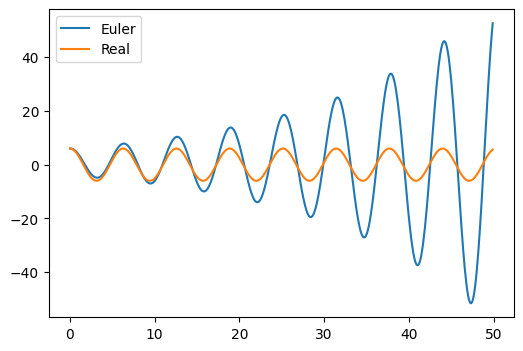

In [3]:
ttime = np.arange(0, totaltime,dt)
harmonic = x[0] * np.cos(np.sqrt(k/m)*ttime)
t = 500 #This is the end timestep of the plot
plt.plot(ttime[:t], x[:t], label = 'Euler')
plt.plot(ttime[:t], harmonic[:t], label = 'Real')
plt.legend()
plt.show()

&nbsp;
&nbsp;
-------
#**PAUSE HERE AND TAKE A BREAK!**
-------

##Simple Application: Projectile Motion

Let's look at a nice problem to get us started.


<p align="center">
  <img width="560" height="200" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSABh0Awe-Z0WmURaV4FGWJhXXYQSAwJ_cYZA&usqp=CAU">
</p>

For simple projectile motion, we have the force equations:

$$\begin{align}
\bar{F}_x &= m a_x = m \frac{dv_x}{dt} = m \frac{d^2 x}{dt^2} = 0 \\
\bar{F}_y &= m a_y = m \frac{dv_y}{dt} = m \frac{d^2 y}{dt^2} =m g
\end{align}$$

&nbsp;

Which we can re-write as:

$$\begin{align}
\frac{dv_x}{dt} = v_x'(t) &= 0 \\
\frac{dv_y}{dt} =v_y'(t) &= g
 \end{align}$$

 &nbsp;

Solving our equation in the y-direction is easy using basic calculus:

$$\begin{align}
\int^t_{t_0}\frac{dv_y}{dt} dt=v_y(t)-v_y(t_0)
 \end{align}$$

$$\begin{align}
v_y(t) = v_y(t_0)+ \int^t_{t_0} F_y\: dt = \int^t_{t_0} m\:g\:dt = v_y(t_0)+ t\cdot m\:g
\end{align}$$

$$\begin{align}
y(t) = y(t_0) + \int^t_{t_0} v_y(t)\: dt = y(t_0) + t\cdot v_y(t_0)+ \frac{1}{2} t^2\cdot m\:g
\end{align}$$



Applying Euler's formula to the projectile motion equations we get:

$$\begin{align}
v_x'(t) &\approx \frac{1}{\Delta t} \left[v_x(t+\Delta t)-v_x(t)\right] =0 \\
v_y'(t) &\approx \frac{1}{\Delta t} \left[v_y(t+\Delta t)-v_y(t)\right] = g
\end{align}$$

&nbsp;

And Solving for the future velocity $\bar{v}(t+\Delta t)$:

$$\begin{align}
v_x(t+\Delta t) &= v_x(t)  \\
v_y(t+\Delta t) &= v_y(t) + \Delta t  \cdot g
\tag{11}
\end{align}$$

&nbsp;

One can see the the similarities of this discretized solution in comparison to the analytical solution.

&nbsp;

Aren't they the exact same thing? No! The subtle difference is that equation (8) has a discretization parameter $\Delta t$ while the analytic solution has a fully, unbounded $t$. This means euler's method can only solve for velocities one discrete time step ($\Delta t$) in the future. While the full analytic solution can solve for any time.

The analytic solution seems much better so what's the point of the "discretization" hocus pocus? This is true, but only for this and other similar ordinary differential equations. We will show that it's not so easy for harder problems and that discretizing and using a computer to solve is just as easy as finding the analytic solution if not easier.

#Finishing off the Projectile Motion problem

We still haven't finished the problem (or did we?) We still need to find the position. Well, actually, we already did as the very first example when introducting Euler's method: equation (5).

$$\begin{align}
x(t+\Delta t) &= x(t) + \Delta t \cdot v_x(t) \\
y(t+\Delta t) &= y(t) + \Delta t \cdot v_y(t)
\tag{12}
\end{align}$$

&nbsp;

Thus our problem is complete. To predict the future position we need the current velocity.

Given an initial position and velocity, one just needs to follow the steps below:

<p align="left">
  <img width="400" src="https://drive.google.com/uc?id=1pdBDSzLjcikMF_eVPdmBnrQLeLS40FNh">
</p>

In [4]:
def EulerProjectile(x0,y0,vx0,vy0,totaltime,dt):
  '''
  Function for performing Euler's Method for the projectile motion of a mass.
  Returns final position and velocity of projectile, after specified time.

  x0,y0: initial x or y position (meters)
  vx0,vy0: initial velocity component in x or y direction (m/s)
  totaltime: how long you want to simulate the projectile motion (seconds)
  dt: the length of time between each step calculated (seconds)
  '''

  #constants
  g = -9.81 #m/s^2

  #total number of time steps (for iteration)
  totalsteps = int(totaltime/dt)

  #create arrays to store position and velocity
  x = np.zeros(totalsteps) # meters
  y = np.zeros(totalsteps) # meters
  vx = np.zeros(totalsteps) # m/s
  vy = np.zeros(totalsteps) # m/s

  #set initial positions and velocities
  x[0] = x0
  y[0] = y0
  vx[0] = vx0
  vy[0] = vy0

  #for loop begins at i=0
  for i in range(totalsteps-1):

    #advance position one time step i+1
    x[i+1] = x[i] + dt * vx[i]
    y[i+1] = y[i] + dt * vy[i]

    #advance velocity
    vx[i+1] = vx[i]
    vy[i+1] = vy[i] + g * dt
  return [x,y,vx,vy]

##Project 2: Write a function that uses Euler Algorithm code to simulate projectile motion

Using the code flow diagram above and the Euler code from the previous exercise, finish the code below to evolve the two position coordinates and their velocities.

Once you finish, play around and change the time step and plot your results. See which time step gives sensible results and which time step begins to take more than a couple of seconds.



Use the following to plot your graph

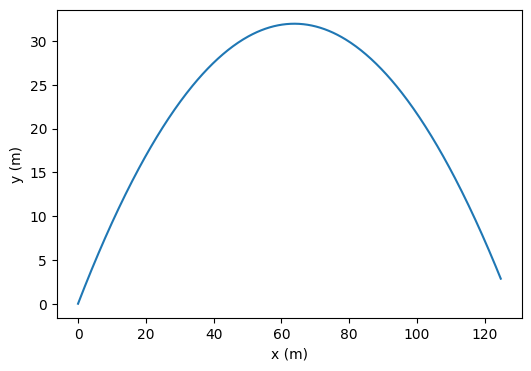

In [5]:
#constants
g = -9.81 #m/s^2

#time step in seconds
dt = 0.01

#total real time in seconds
totaltime = 5.0

#initial conditions
x0 = 0.0
y0 = 0.0
vx0 = 25.0
vy0 = 25.0

[x,y,vx,vy] = EulerProjectile(x0,y0,vx0,vy0,totaltime,dt)

plt.plot(x,y)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

In less than 5 lines of code for the main algorithm loop we have solved the projectile motion equations.
This is in comparison to maybe one or two lines of using analytic integrals.

You can imagine we will need at least two lines of code for every dimension (one for position and one for velocity). Therefore, for a 3D problem, we would need a total of 6 lines of code plus one for the loop.

###Please stay after for a few minutes if you want to make plans with other students to work on the optional homework.

# **Challenge problem: Mass on a Spring Pendulum**
This will be the homework exercise for this lesson!

&nbsp;

Projectiles are fun but some physics is more complicated than just the force of gravity.

Let's try to solve a [mass on a spring that also serves as a pendulum](https://upload.wikimedia.org/wikipedia/commons/2/25/Animated-mass-spring.gif).

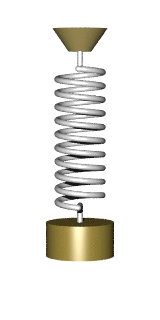

In this case our equation of motion is:

$$\begin{align}
\bar{F} = m\bar{a} = -k\: \left( |\bar{r}| - r_{eq}\right) \hat{r} + m\: \bar{g}
\tag{13}
\end{align}$$
&nbsp;

We will solve this equation in 2D just as we did projectile motion. Thus:

$$\begin{align}
\bar{r} = \left[\begin{array}
{rrr}
x \\
y
\end{array}\right]
\tag{14}
\end{align}$$

Is the current position of the mass. And

$$\begin{align}
\hat{r} = \frac{\bar{r}}{|\bar{r}|}
\tag{15}
\end{align}$$

is the unit position vector (to specify direction with a vector magnitude of 1).

&nbsp;

The magnitude of the mass's position is

$$\begin{align}
|\bar{r}| = \sqrt{x^2 + y^2}
\tag{16}
\end{align}$$

&nbsp;

And $r_{eq}$ is the equilibrium length of the spring. Finally, our gravitational acceleration is:


$$\begin{align}
\bar{g} = \left[\begin{array}
{rrr}
0 \\
-g
\end{array}\right]
\tag{17}
\end{align}$$

&nbsp;

Our 2D equations are then:

$$\begin{align}
\left[\begin{array}
{rrr}
v_x^{'} \\
v_y^{'}
\end{array}\right] = -\frac{k}{m} \frac{\left(|\bar{r}| - r_{eq} \right)}{|\bar{r}|} \left[\begin{array}
{rrr}
x \\
y
\end{array}\right] + \left[\begin{array}
{rrr}
0\\
-g
\end{array}\right]
\tag{18}
\end{align}$$

Where the mass term 'm' was divided on both sides

We can thus discretize our 2D System of equations as we did for the projectile motion:

$$\begin{align}
v_x'(t) &\approx \frac{1}{\Delta t} \left[v_x(t+\Delta t)-v_x(t)\right] = -\frac{k}{m} \frac{\left(|\bar{r}| - r_{eq} \right)}{|\bar{r}|} \: x\\
v_y'(t) &\approx \frac{1}{\Delta t} \left[v_y(t+\Delta t)-v_y(t)\right] = -\frac{k}{m} \frac{\left(|\bar{r}| - r_{eq} \right)}{|\bar{r}|} \: y - g
\end{align}$$

&nbsp;

And Solving for the future velocity $\bar{v}(t+\Delta t)$:

$$\begin{align}
v_x(t+\Delta t) &= v_x(t) -\frac{k \Delta t}{m} \frac{\left(|\bar{r}| - r_{eq} \right)}{|\bar{r}|} \: x \\
v_y(t+\Delta t) &= v_y(t) -\frac{k \Delta t}{m} \frac{\left(|\bar{r}| - r_{eq} \right)}{|\bar{r}|} \: y - \Delta t  \cdot g
\tag{18}
\end{align}$$


Finally, our future position is calculated as in equation (12)

$$\begin{align}
x(t+\Delta t) &= x(t) + \Delta t \cdot v_x(t) \\
y(t+\Delta t) &= y(t) + \Delta t \cdot v_y(t)
\tag{12}
\end{align}$$

#Project 3a: Make a code flow diagram for mass on a spring simulation

define initial position and velocity \\
advance position by time step \\
advance velocity by time step

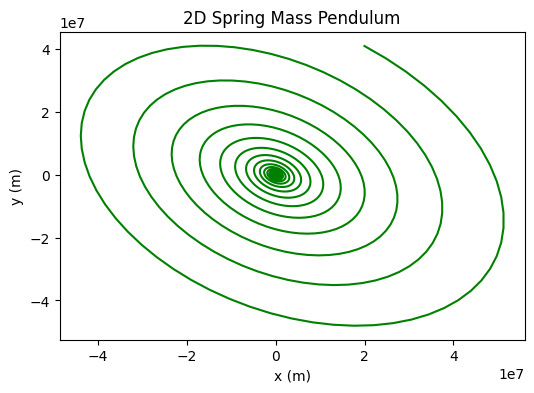

In [7]:
def EulerSpring(x0,y0,vx0,vy0,time,dt):
    g=-9.81
    k = 100.0
    m = 1.0
    req = 1.0
    steps = int(time/dt)

    x = np.zeros(steps)
    y = np.zeros(steps)
    vx = np.zeros(steps)
    vy = np.zeros(steps)

    x[0] = x0
    y[0] = y0
    vx[0] = vx0
    vy[0] = vy0

    for i in range(steps-1):
        x[i+1] = x[i] + dt * vx[i]
        y[i+1] = y[i] + dt * vy[i]

        r = np.sqrt(x[i+1] ** 2 + y[i+1] ** 2)
        vx[i+1] = vx[i] - x[i] * k * dt * 1/m * (r - req)/r
        vy[i+1] = vy[i] - y[i] * k * dt * 1/m * (r - req)/r - g * dt
    return [x,y,vx,vy]

dt = 0.01
time = 50.0

x0 = 0
y0 = 0
vx0 = 10
vy0 = 10

[x,y,vx,vy] = EulerSpring(x0,y0,vx0,vy0,time,dt)

plt.plot(x,y, color = "green")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("2D Spring Mass Pendulum")
plt.show()